In [4]:
#Emotion mining of Apple Watch Series 6.

In [ ]:
import requests

In [2]:
from bs4 import BeautifulSoup as bs

In [6]:
bt='https://www.amazon.in'

In [9]:
ul='https://www.amazon.in/New-Apple-Watch-GPS-44mm-Aluminium/product-reviews/B08J69JQV2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [11]:
cust_name = []   
review_title = []
rate = []
review_content = []

In [13]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()      
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [15]:
len(cust_name)

262

In [21]:
len(review_title)

262

In [22]:
len(review_content)

262

In [24]:
len(rate)

262

In [26]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [28]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in c:\users\shubham\anaconda3\lib\site-packages (0.15.3)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
df = pd.DataFrame()

In [34]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [36]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,Nimit,It is the best smartwatch iPhone users can get!,5.0 out of 5 stars,There are hundreds of reviews about all the ...
1,Kuriakose K Biju,One of the best smart watch out there,5.0 out of 5 stars,"Brighter display, better performance, faster..."
2,Padmanabhan,Great piece of engineering,5.0 out of 5 stars,I have recently upgraded from Apple Watch Se...
3,Dr Sumeet Pawar,Great upgrade!!!,5.0 out of 5 stars,Beautiful product. It is a fantastic upgrade...
4,KV,1st Apple Watch,5.0 out of 5 stars,"In one word, the watch is phenomenal.I recei..."
5,Nj123nj,Poor product quality,1.0 out of 5 stars,"Poor product quality,mine came defective cha..."
6,Mahesh Pratap Singh,मै असंतुष्ट हूँ एप्पल घड़ी से।,1.0 out of 5 stars,बड़ी उम्मीद के साथ ख़रीदी घड़ी पर बेकार निकल...
7,Sritam Samantaray,Maybe go for a SE model or 5. 6 isn’t worth th...,4.0 out of 5 stars,Watch is overall a win but there are 2things...
8,DEEPAK SHENOY,Best experience,5.0 out of 5 stars,It’s not a watch...it’s an experience. Aweso...
9,Imtiyaz k.,Worst Experience! Rubbish,1.0 out of 5 stars,I purchased apple 6 watch before 3 months an...


In [47]:
import spacy

In [50]:
df.dtypes


Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [52]:
df['Rating'] = [titles.rstrip(' out of 5 stars') for titles in df['Rating']]

In [54]:
df['Rating']

0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
      ... 
257    5.0
258    5.0
259    4.0
260    1.0
261    1.0
Name: Rating, Length: 262, dtype: object

In [56]:
df['Rating'].value_counts(normalize=True)*100

5.0    71.755725
1.0    11.068702
4.0    10.305344
3.0     5.725191
2.0     1.145038
Name: Rating, dtype: float64

In [58]:
ratings=df.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,29,29,29
2.0,3,3,3
3.0,15,15,15
4.0,27,27,27
5.0,188,188,188


Text(0, 0.5, 'Count')

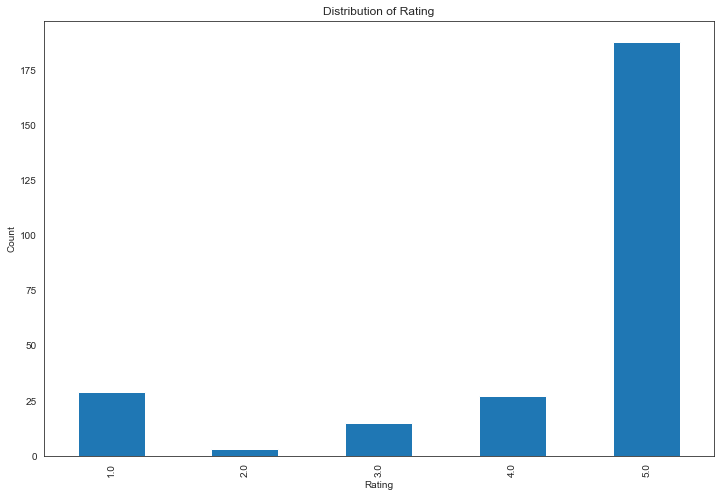

In [60]:
plt.figure(figsize=(12,8))
df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

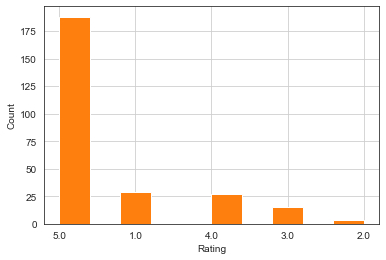

In [62]:
df.Rating.hist()
df.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [64]:
df.iloc[:,[3]]

,Reviews
0,There are hundreds of reviews about all the ...
1,"Brighter display, better performance, faster..."
2,I have recently upgraded from Apple Watch Se...
3,Beautiful product. It is a fantastic upgrade...
4,"In one word, the watch is phenomenal.I recei..."
...,...
257,I though twice to buy such expensive stuff f...
258,great product
259,Very costly
260,Not worth the priceNothing special better ge...


In [66]:
Reviews=df.iloc[:,[3]]

In [67]:
Reviews.shape

(262, 1)

In [68]:
Reviews.describe()

,Reviews
count,262
unique,254
top,Excellent
freq,3


In [69]:
Reviews.dtypes

Reviews    object
dtype: object

In [70]:
df.drop(["Customer Name","Review Title"],axis=1,inplace=True)

df.head()

,Rating,Reviews
0,5.0,There are hundreds of reviews about all the ...
1,5.0,"Brighter display, better performance, faster..."
2,5.0,I have recently upgraded from Apple Watch Se...
3,5.0,Beautiful product. It is a fantastic upgrade...
4,5.0,"In one word, the watch is phenomenal.I recei..."


In [71]:
df.dropna(inplace=True)

In [73]:
df['Reviews']= df['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [75]:
import string
df['Reviews']=df['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [77]:
df['Reviews']=df['Reviews'].str.replace('[0-9]','')

In [79]:
from nltk.corpus import stopwords

In [80]:
stop_words=stopwords.words('english')

In [83]:
df['Reviews']=df['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [84]:
df

,Rating,Reviews
0,5.0,hundreds reviews different apple watches avail...
1,5.0,brighter display better performance faster cha...
2,5.0,recently upgraded apple watch series series sa...
3,5.0,beautiful product fantastic upgrade existing s...
4,5.0,one word watch phenomenali received defective ...
...,...,...
257,5.0,though twice buy expensive stuff amazon always...
258,5.0,great product
259,4.0,costly
260,1.0,worth pricenothing special better get galaxy w...


In [86]:
from textblob import Word
df['Reviews']= df['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
df['Reviews']= df['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [87]:
df['Reviews'].head()

0    hundred review different apple watch available...
1    brighter display better performance faster cha...
2    recently upgraded apple watch series series sa...
3    beautiful product fantastic upgrade existing s...
4    one word watch phenomenali received defective ...
Name: Reviews, dtype: object

In [97]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(df['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

KeyError: 'Reviews'

In [99]:
freq = pd.Series(' '.join(df['Reviews']).split()).value_counts()[:10]
freq

KeyError: 'Reviews'

In [100]:
df['Reviews'] = df['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Reviews'].head()


KeyError: 'Reviews'